In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# import report_ensemble
from diabnet.analysis import report
from diabnet.ensemble import Ensemble
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


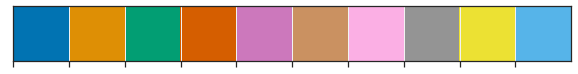

In [7]:
colors = sns.color_palette("colorblind")
sns.palplot(colors)
sns.set_palette(colors)
# sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-'})
sns.set_context("paper")

In [18]:
ensemble = Ensemble('../results/models/positive/model-positive-21-adamw-lc7-2021-10-05')
r = report.DiabNetReport(ensemble, "positivo_1000_random_0.csv")

NEGATIVE FILE ../data/datasets/visits_sp_unique_test_positivo_1000_random_0_negatives_older60.csv


In [19]:
df = pd.DataFrame(r.dataset_test_unique.features)
df.columns = r.feat_names
df['T2D'] = r.dataset_test_unique.labels
# df['Pred'] = r.dataset_test_unique.predictions
df['Pred'] =  r.dataset_test_unique.predictions

In [21]:
df

,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,snp_18_56742728,snp_3_75912490,...,snp_20_50189624,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,sex,mo_t2d,fa_t2d,T2D,Pred
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,51,M,2,2,1,9.986132e-01
1,0,0,0,1,0,1,1,0,0,1,...,1,1,0,1,40,F,0,1,0,6.849491e-06
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,52,F,0,2,1,1.570610e-01
3,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,34,M,0,1,0,2.554847e-06
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,37,F,1,1,0,1.617719e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0,2,0,1,0,1,1,0,0,0,...,0,1,0,1,36,M,1,0,0,1.192035e-06
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,41,M,0,2,0,3.731071e-01
547,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,67,F,2,2,0,9.517392e-07
548,0,0,1,1,0,1,1,0,0,1,...,1,1,0,1,41,F,0,2,0,1.115489e-02


## Por que alguns pacientes diabéticos não são identificados?

Quais caracerísticas diferem "true positives" de "false negatives"?

**Hipótese:** Os "false negatives" tem maior contribuição ambiental e menor contribuição genética.

*Possíveis pistas:*
- Frequência no diagnóstico dos pais.
- Idade
- BMI
- ~Sexo~

In [22]:
df0 = df[df.T2D == 1]
df0 = df0[['AGE','sex','mo_t2d', 'fa_t2d', 'Pred']]
# df0['positives'] = df0.Pred < .5 
df0['positives'] = ["FN" if x else "TP" for x in df0.Pred < .5]  

In [23]:
df0[df0.positives == 'TP']

,AGE,sex,mo_t2d,fa_t2d,Pred,positives
0,51,M,2,2,0.998613,TP
5,53,F,1,1,0.999931,TP
6,39,F,2,0,1.000000,TP
15,28,F,0,2,0.972125,TP
20,40,F,2,2,0.915556,TP
...,...,...,...,...,...,...
523,61,M,2,2,0.623959,TP
534,44,F,2,2,0.618610,TP
541,38,F,1,1,0.698216,TP
542,54,F,2,2,0.999940,TP


In [24]:
df0

,AGE,sex,mo_t2d,fa_t2d,Pred,positives
0,51,M,2,2,0.998613,TP
2,52,F,0,2,0.157061,FN
5,53,F,1,1,0.999931,TP
6,39,F,2,0,1.000000,TP
13,40,F,2,1,0.285855,FN
...,...,...,...,...,...,...
539,53,F,1,1,0.183387,FN
540,52,M,2,2,0.498221,FN
541,38,F,1,1,0.698216,TP
542,54,F,2,2,0.999940,TP


In [26]:
109/156

0.6987179487179487

<AxesSubplot:xlabel='positives', ylabel='AGE'>

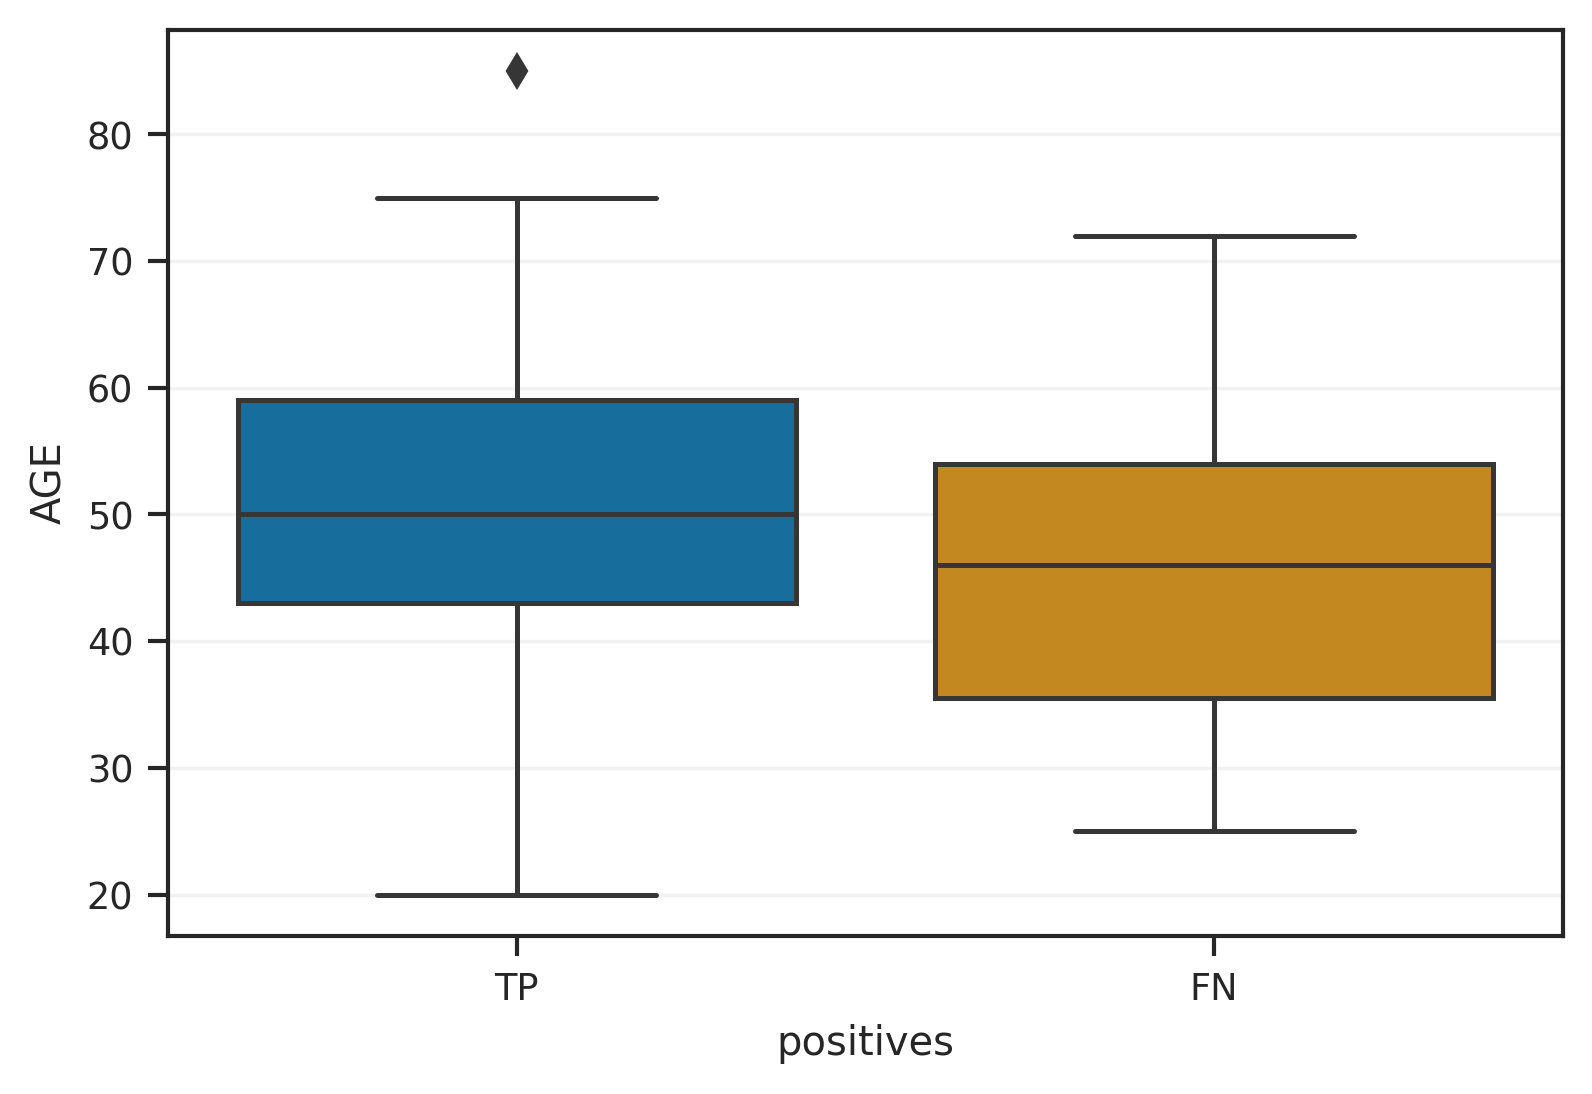

In [27]:
plt.figure(dpi=300)
sns.boxplot(y='AGE', x='positives', data=df0)

<AxesSubplot:xlabel='sex', ylabel='count'>

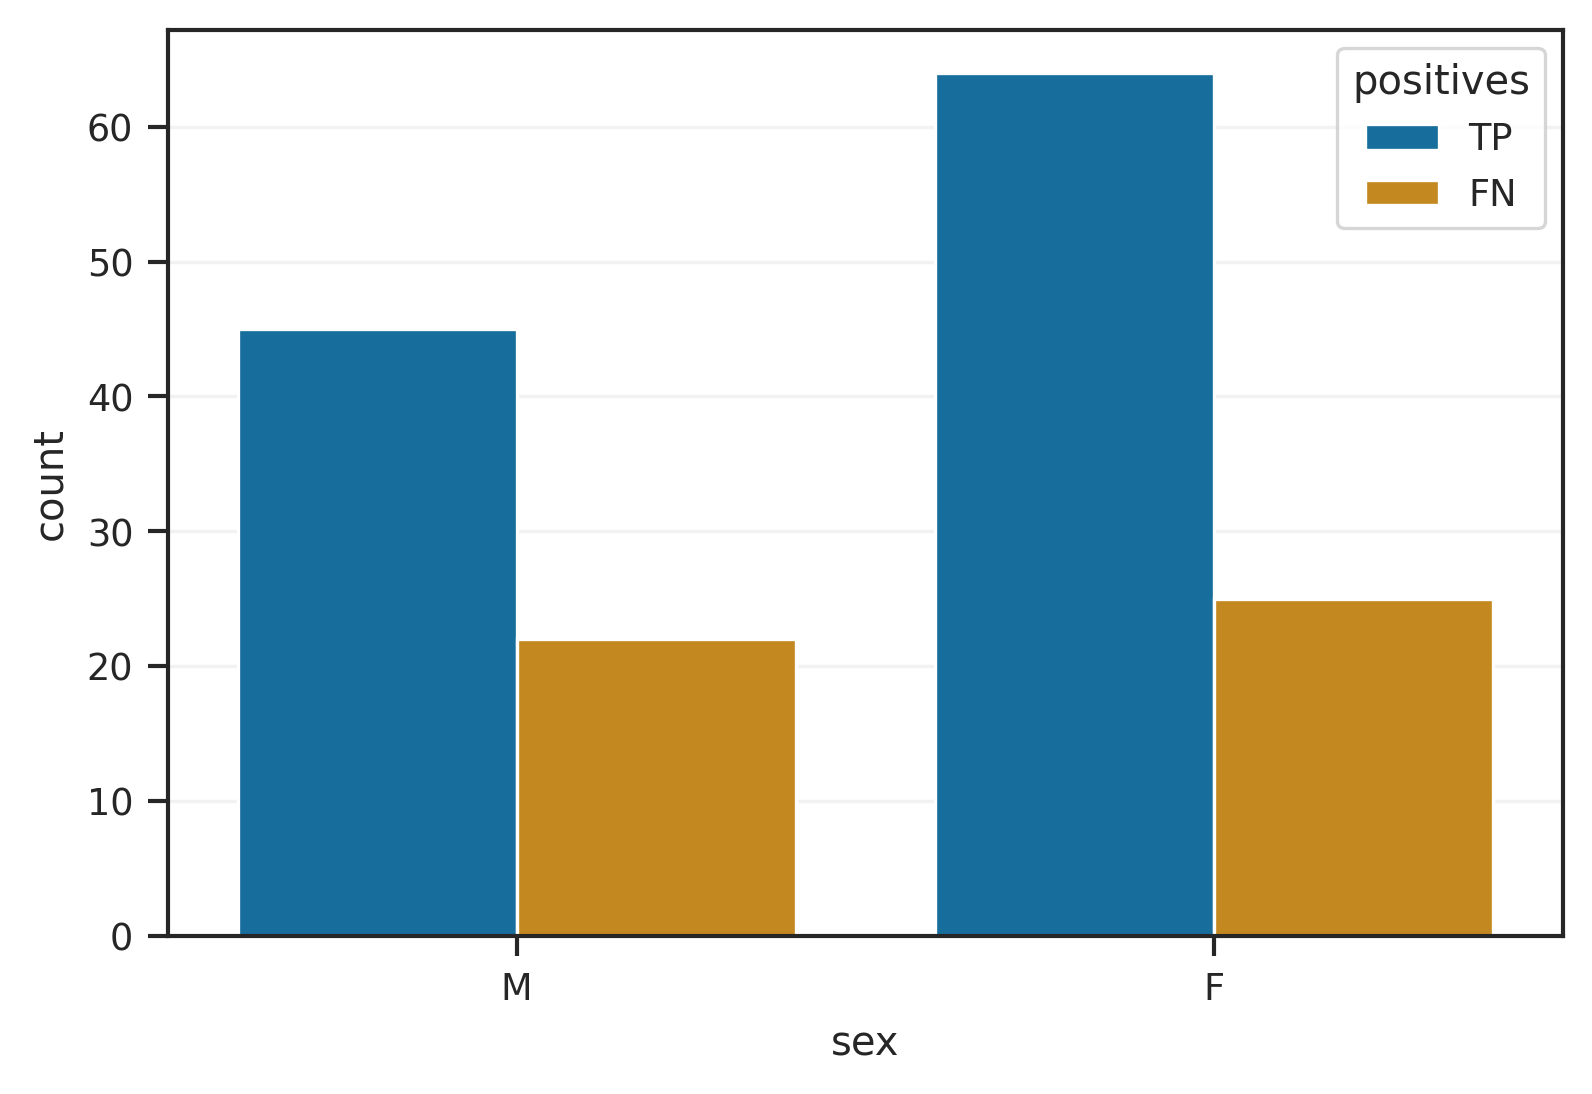

In [28]:
plt.figure( dpi=300)
sns.countplot(x='sex', hue='positives', data=df0)

<AxesSubplot:xlabel='mo_t2d', ylabel='count'>

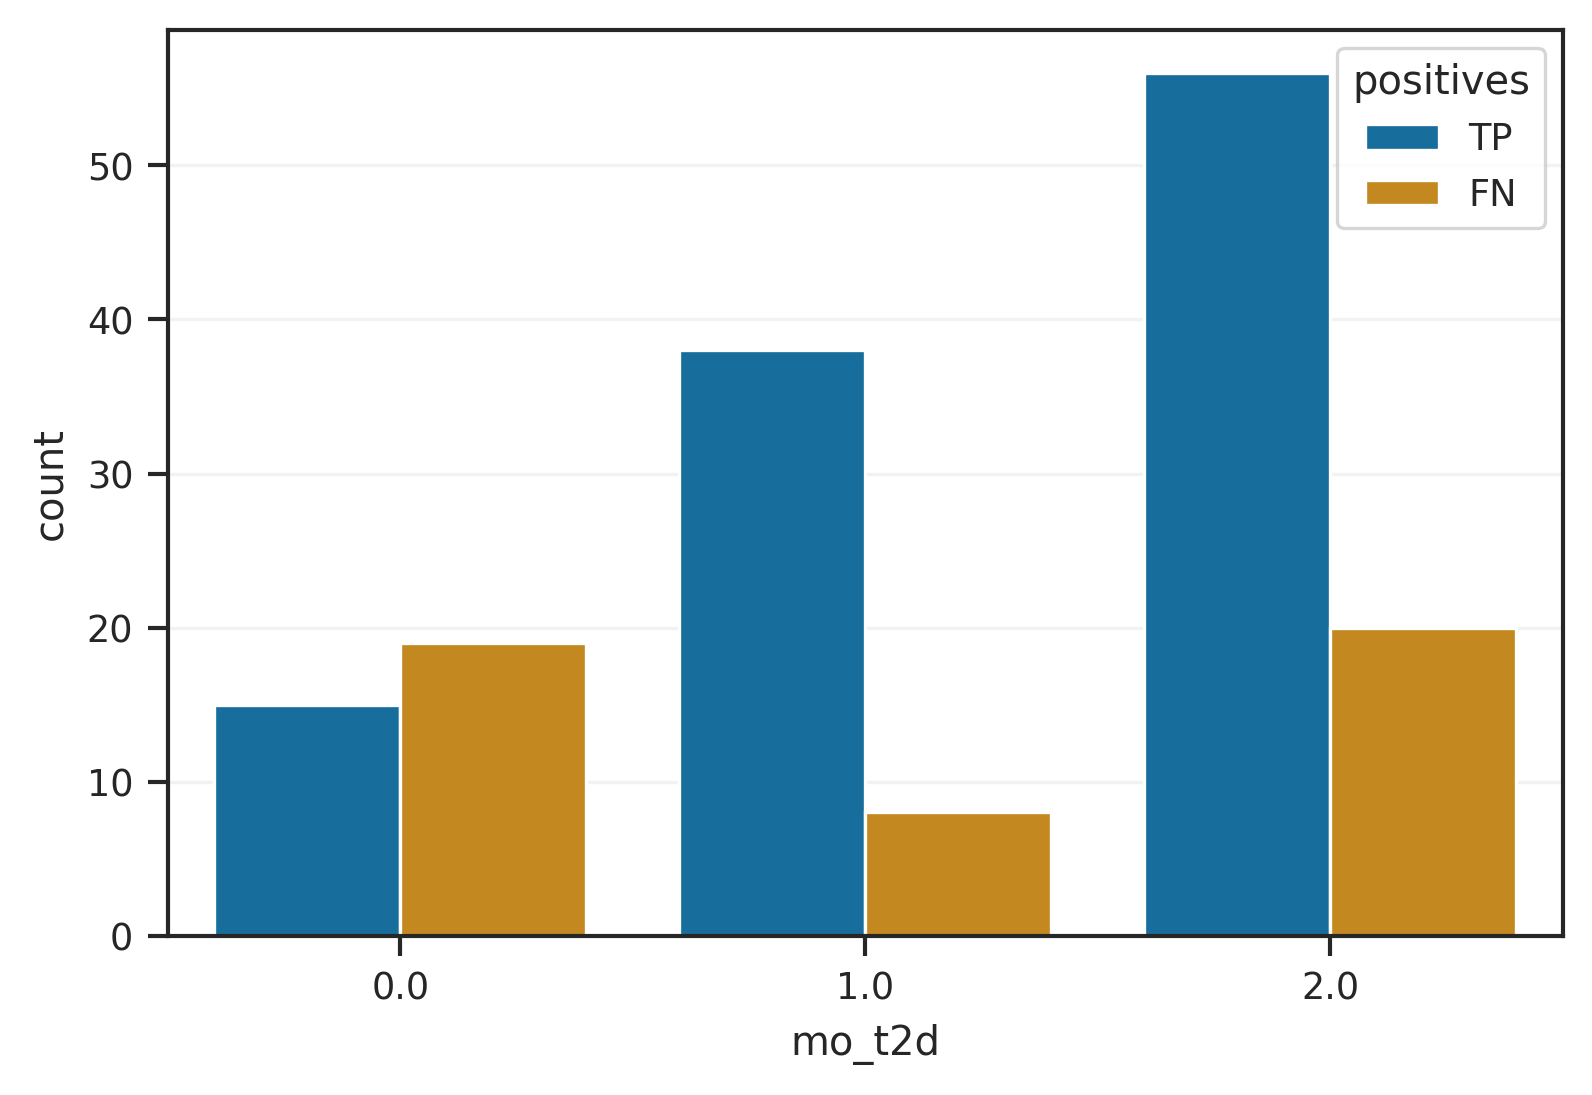

In [29]:
plt.figure( dpi=300)
sns.countplot(x='mo_t2d', hue='positives', data=df0)

<AxesSubplot:xlabel='fa_t2d', ylabel='count'>

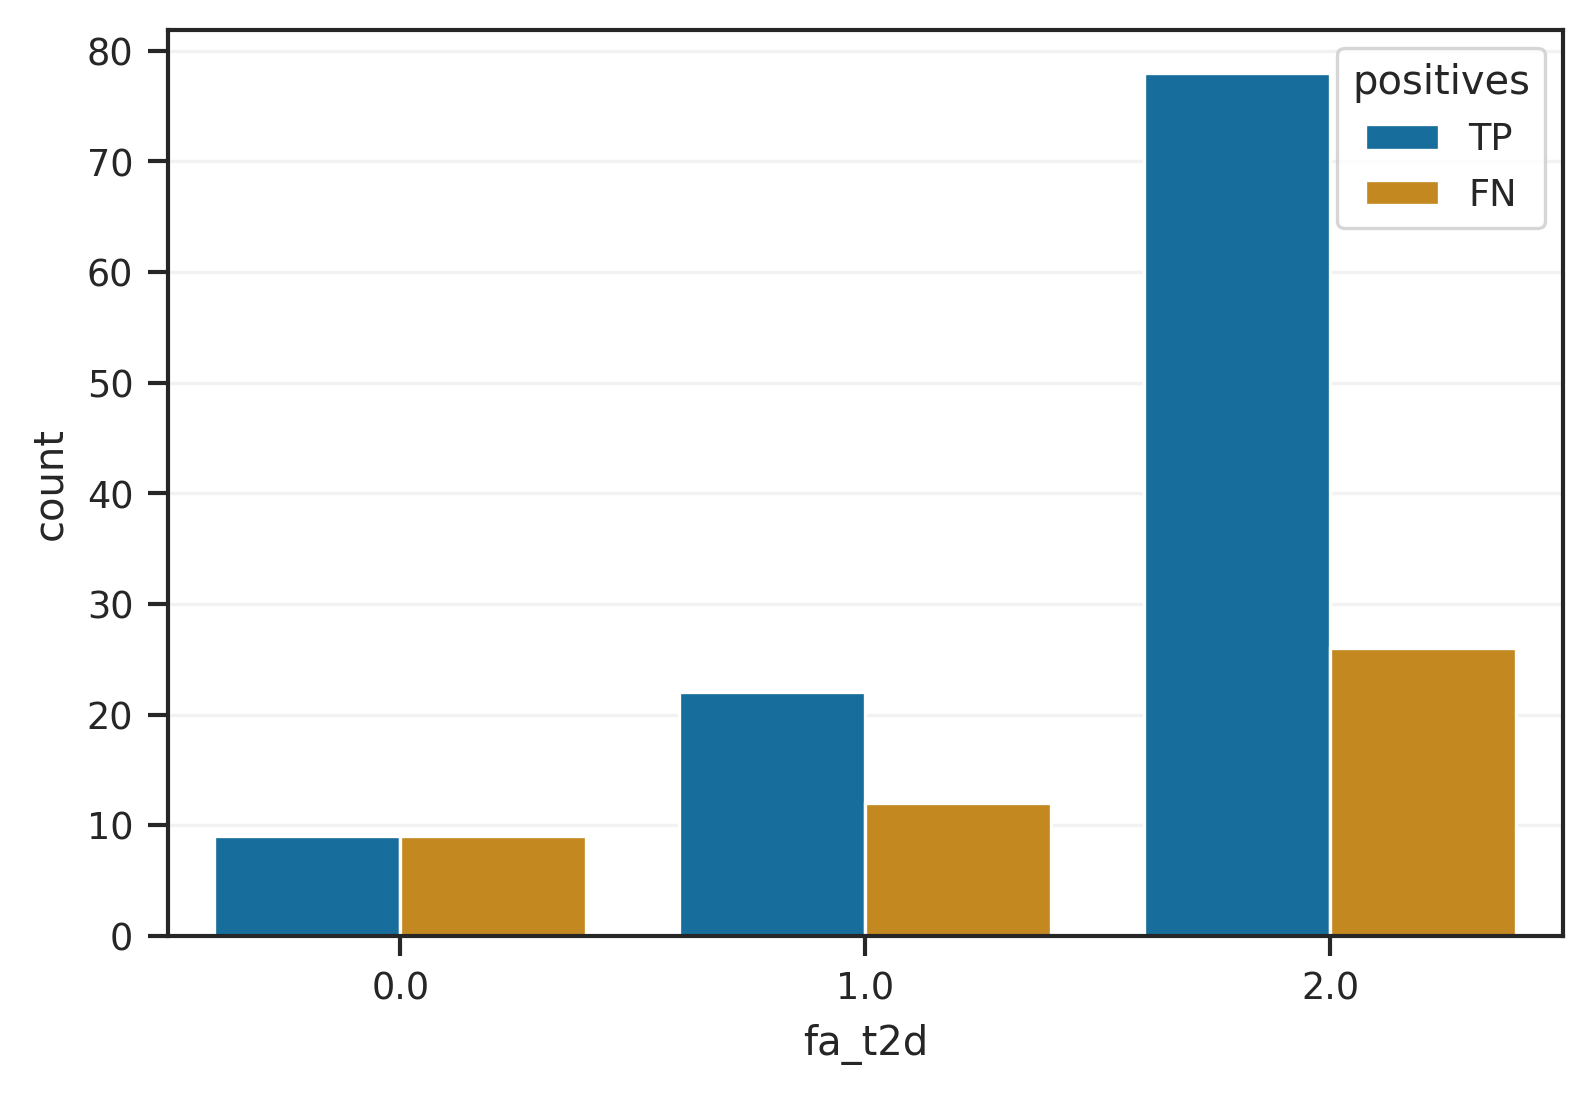

In [30]:
plt.figure( dpi=300)
sns.countplot(x='fa_t2d', hue='positives', data=df0)

<AxesSubplot:xlabel='mo_t2d', ylabel='AGE'>

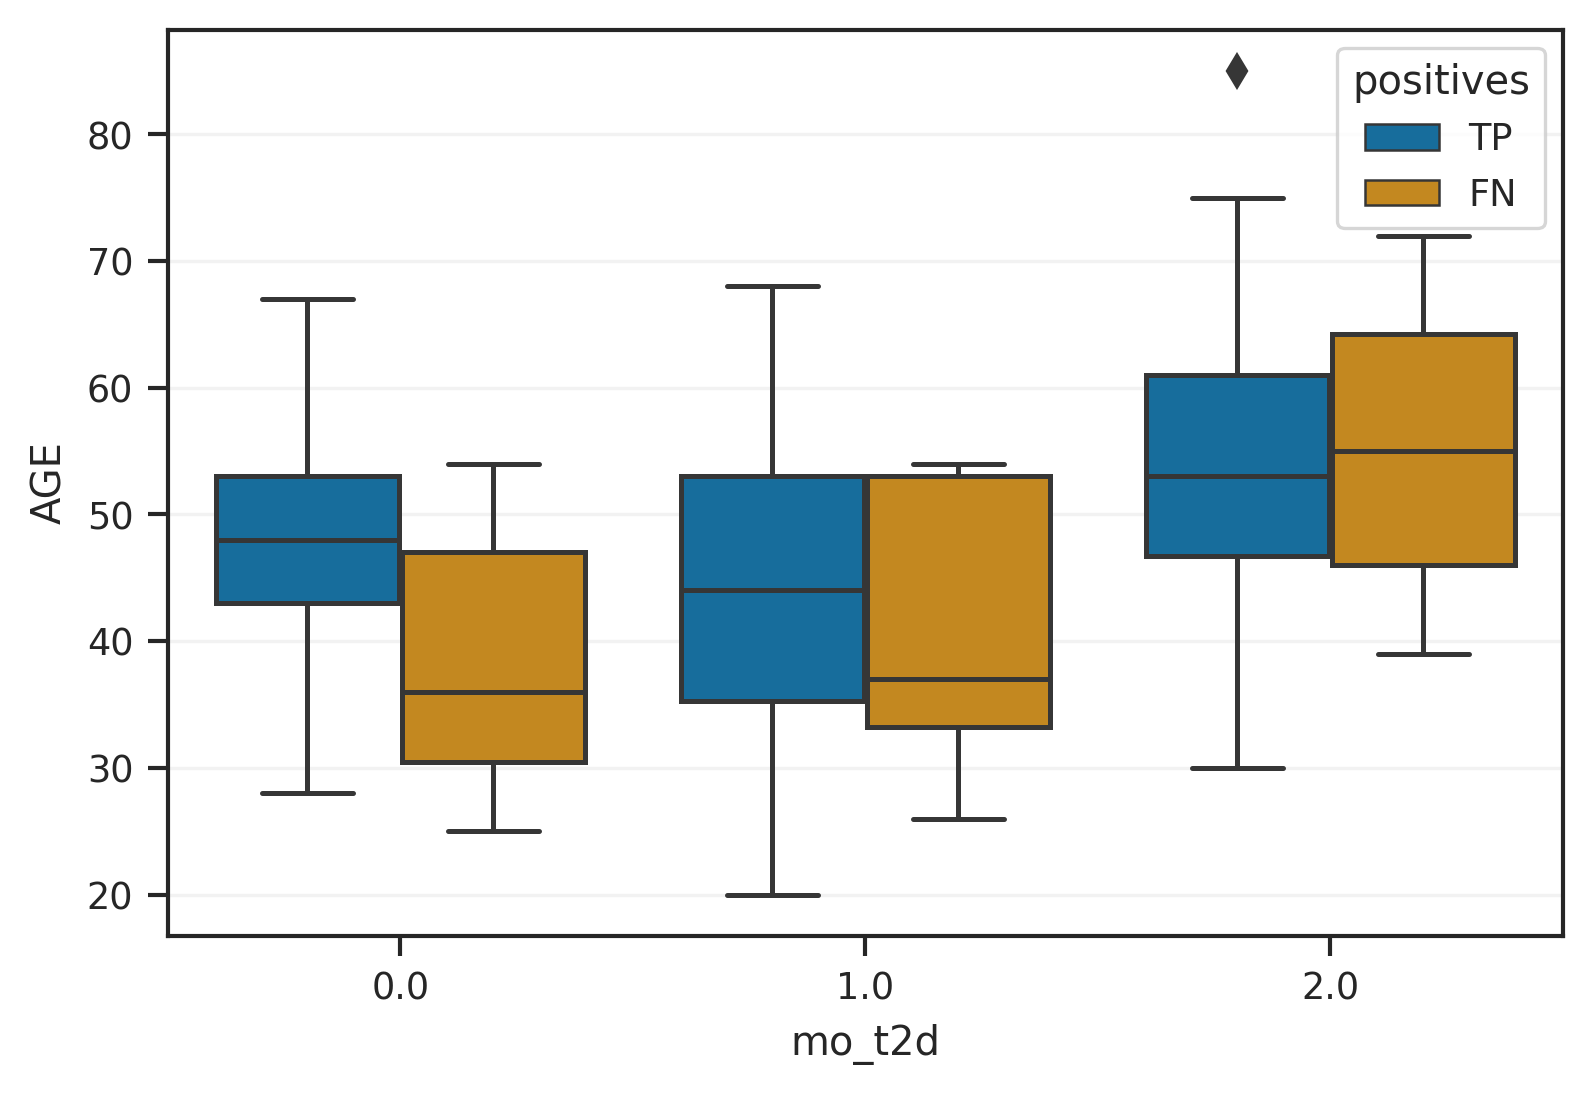

In [31]:
plt.figure( dpi=300)
sns.boxplot(y='AGE', x='mo_t2d',hue='positives', data=df0)

In [15]:
# pd.read_csv("../data/datasets/visits_sp_unique_test_positivo_1000_negative_0.csv")

## Qual o perfil dos não diabéticos preditos como diabéticos?

........

In [32]:
df1 = df[df.T2D == 0]
df1 = df1[['AGE','sex','mo_t2d', 'fa_t2d', 'Pred']]
# df0['positives'] = df0.Pred < .5 
df1['negatives'] = ["TN" if x else "FP" for x in df1.Pred < .5] 

In [33]:
df1[df1.negatives == 'FP']

,AGE,sex,mo_t2d,fa_t2d,Pred,negatives
8,52,F,0,2,0.821131,FP
40,63,F,2,2,0.569677,FP
53,64,F,0,2,0.726566,FP
56,57,M,0,1,0.829622,FP
68,62,F,2,2,0.607367,FP
83,59,F,0,2,0.775099,FP
86,64,F,2,1,0.523654,FP
91,35,M,0,2,0.761184,FP
98,47,F,1,2,0.926908,FP
163,72,M,0,2,0.856464,FP


<AxesSubplot:xlabel='negatives', ylabel='AGE'>

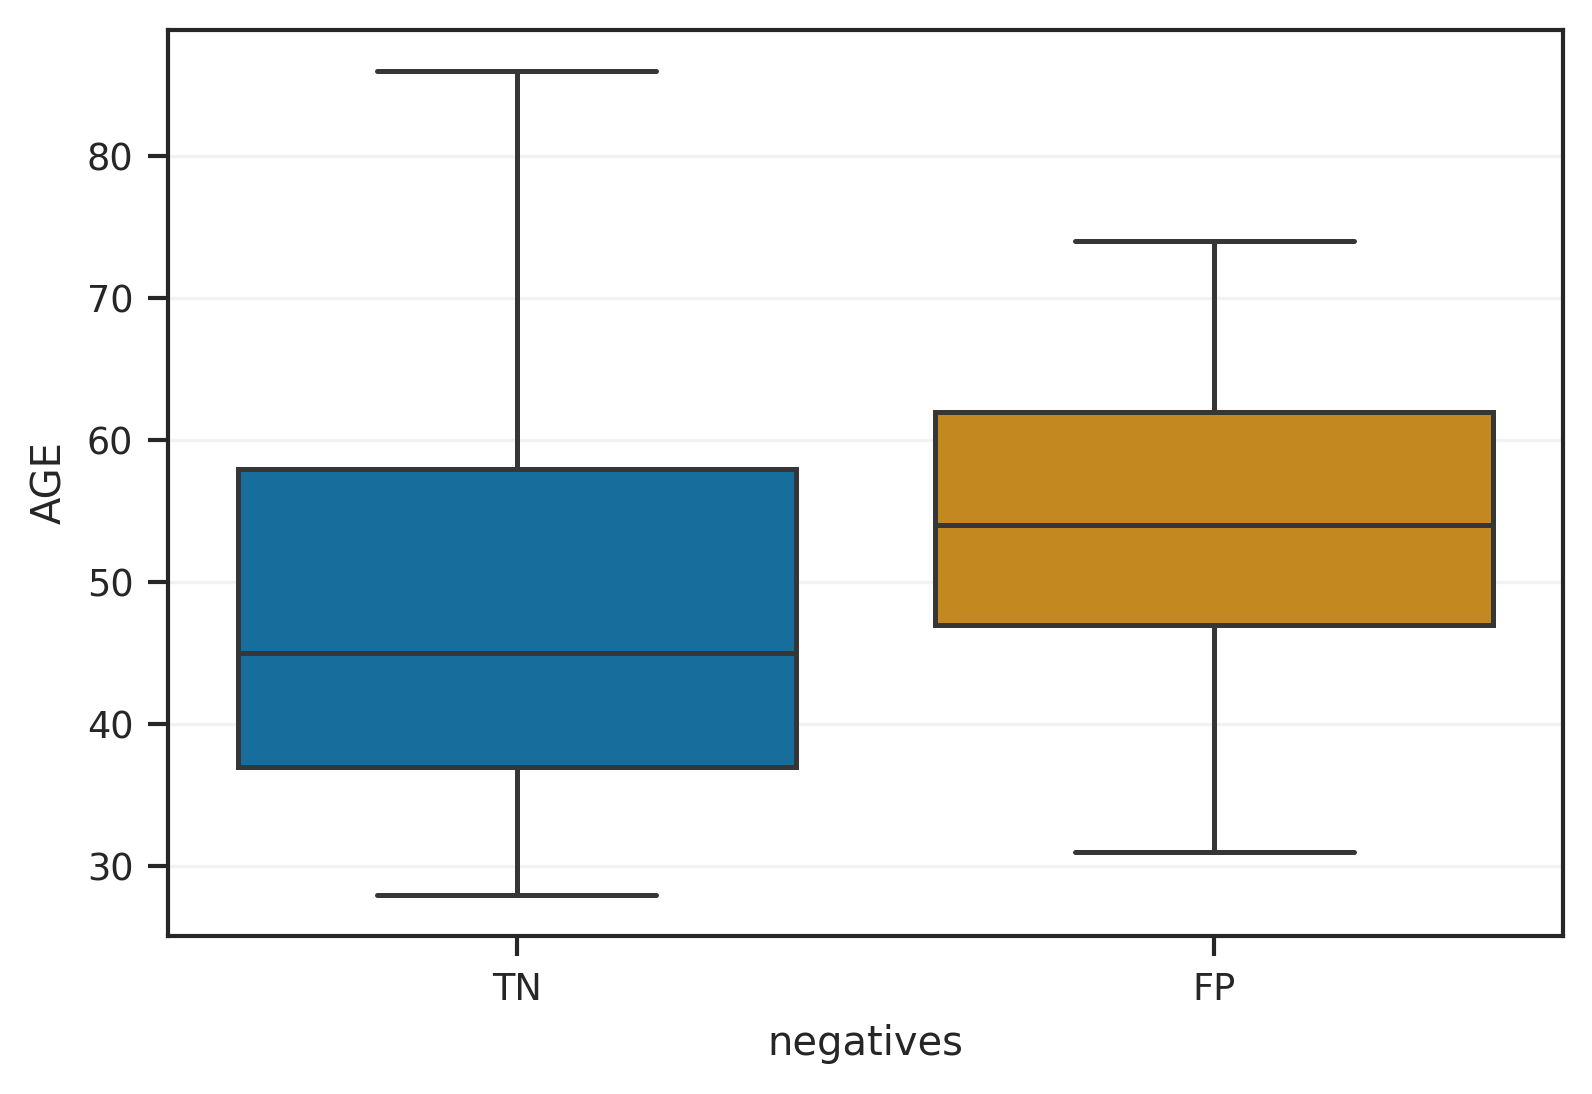

In [34]:
plt.figure( dpi=300)
sns.boxplot(y='AGE', x='negatives', data=df1)

<AxesSubplot:xlabel='sex', ylabel='count'>

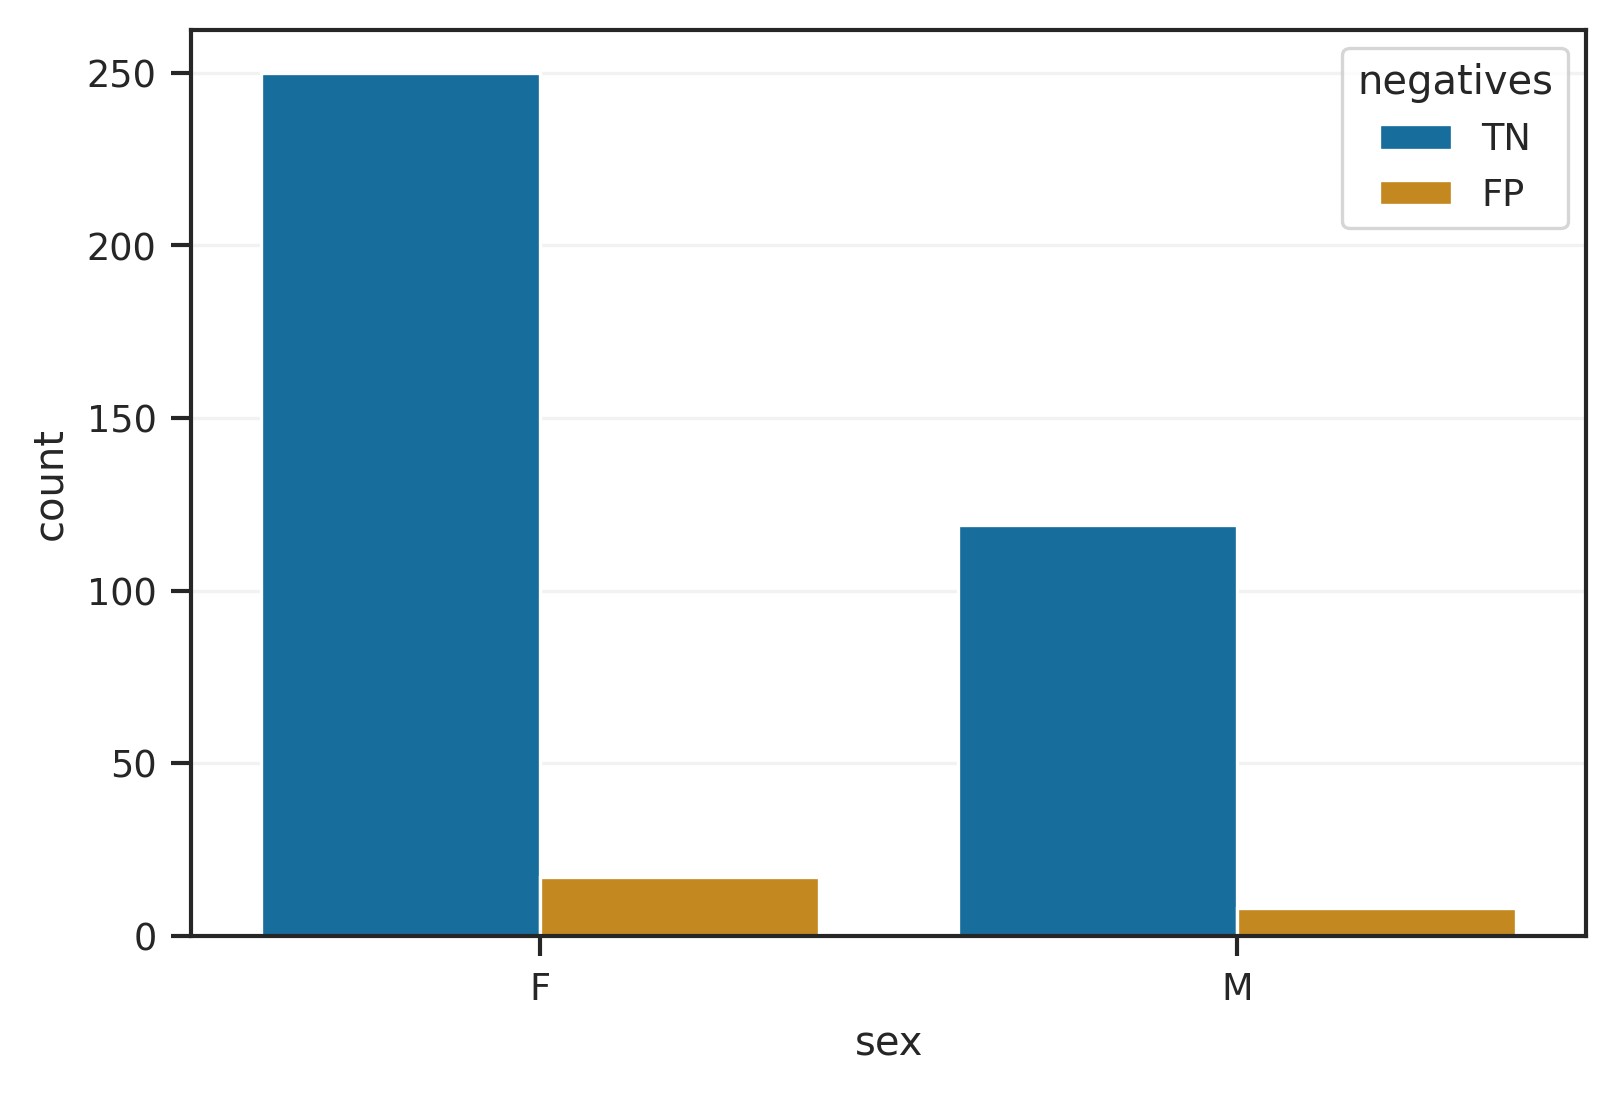

In [35]:
plt.figure( dpi=300)
sns.countplot(x='sex', hue='negatives', data=df1)

<AxesSubplot:xlabel='mo_t2d', ylabel='count'>

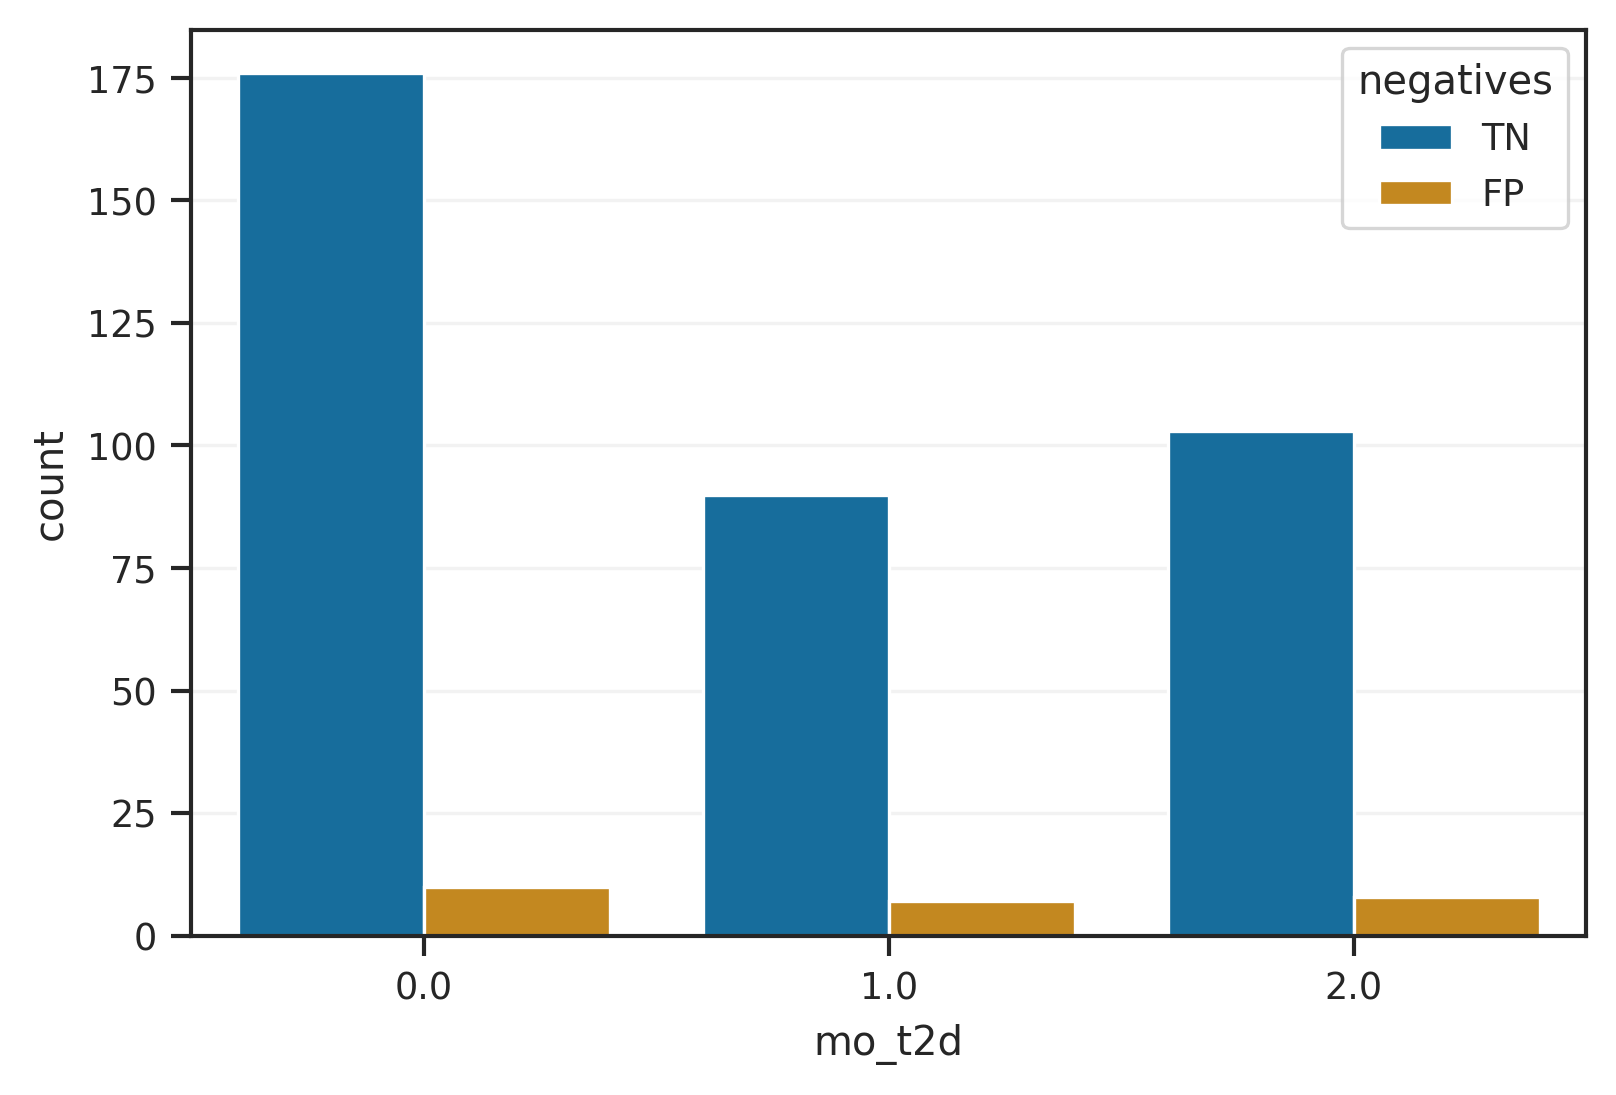

In [36]:
plt.figure( dpi=300)
sns.countplot(x='mo_t2d', hue='negatives', data=df1)

<AxesSubplot:xlabel='fa_t2d', ylabel='count'>

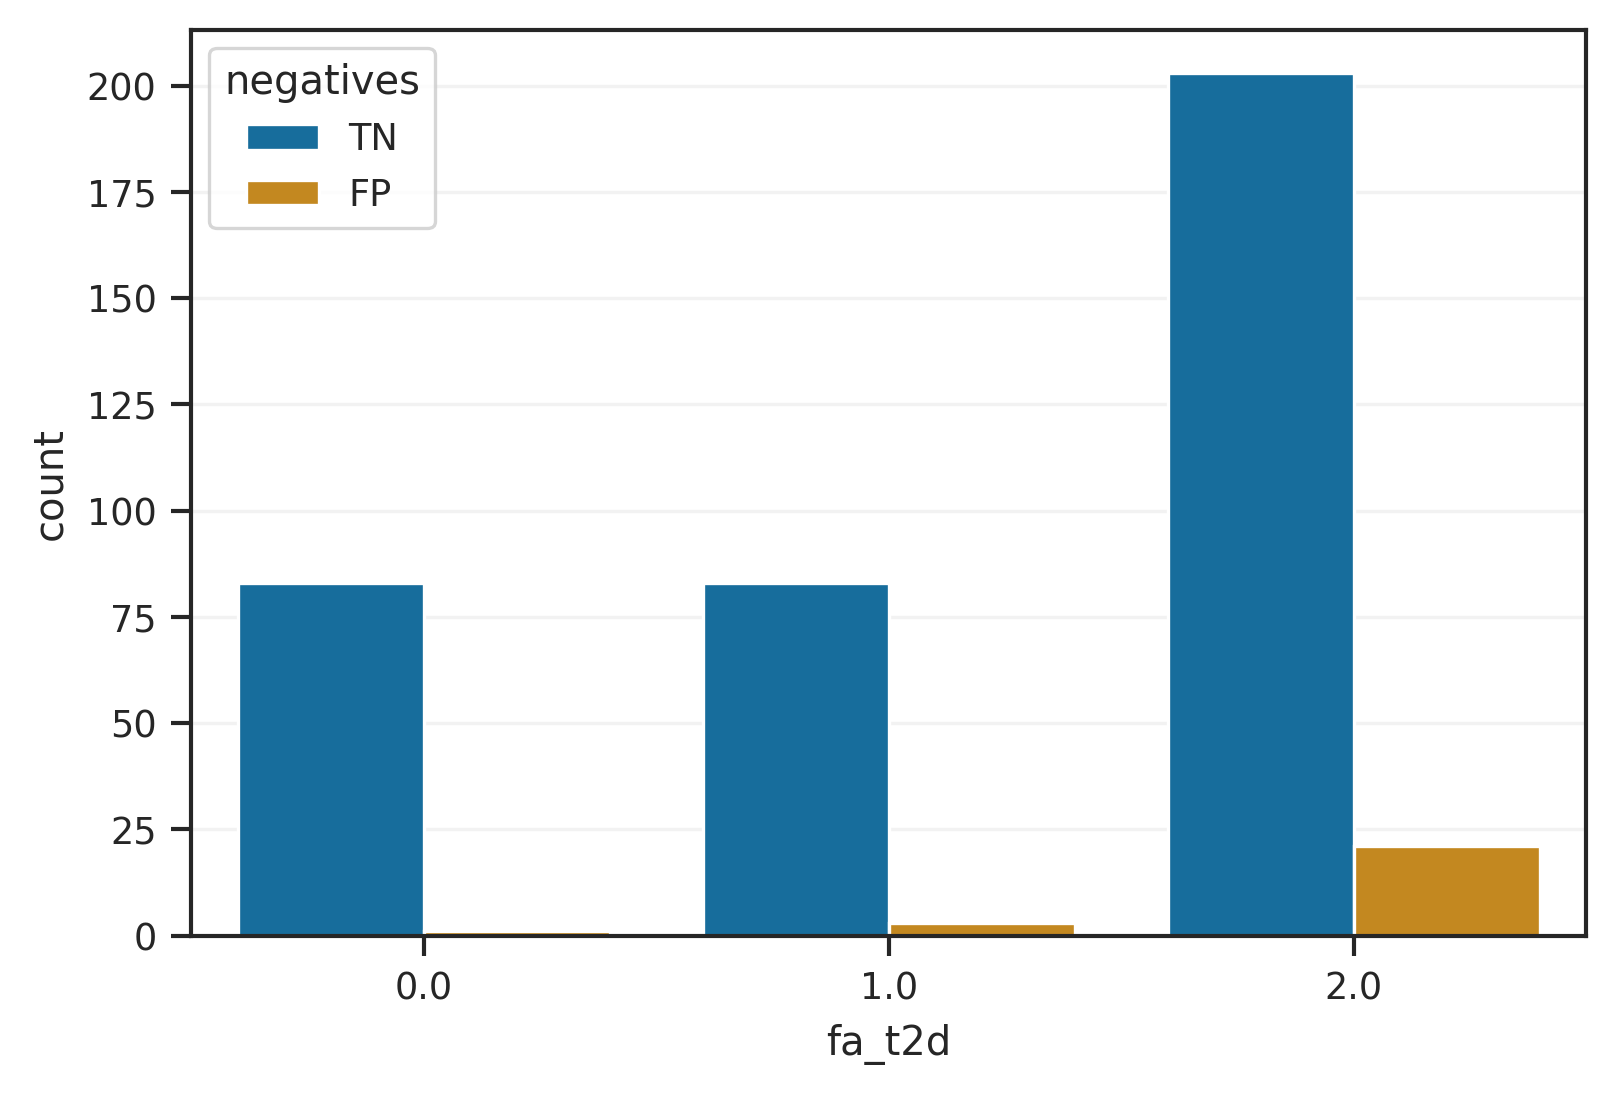

In [37]:
plt.figure( dpi=300)
sns.countplot(x='fa_t2d', hue='negatives', data=df1)

In [38]:
df1

,AGE,sex,mo_t2d,fa_t2d,Pred,negatives
1,40,F,0,1,6.849491e-06,TN
3,34,M,0,1,2.554847e-06,TN
4,37,F,1,1,1.617719e-07,TN
7,61,F,2,2,7.639419e-02,TN
8,52,F,0,2,8.211309e-01,FP
...,...,...,...,...,...,...
544,34,F,0,1,1.622761e-07,TN
545,36,M,1,0,1.192035e-06,TN
546,41,M,0,2,3.731071e-01,TN
547,67,F,2,2,9.517392e-07,TN


In [39]:
print(f"A porcentagem de falsos positivos é de {len(df1[df1.negatives == 'FP'])/len(df1)*100:.2f}%.")
print(f"A porcentagem de falsos negativos é de {len(df0[df0.positives == 'FN'])/len(df0)*100:.2f}%.")

A porcentagem de falsos positivos é de 6.35%.
A porcentagem de falsos negativos é de 30.13%.


A maior porcentagem de falsos negativos em relação aos falsos positivos e maior proporção de indivíduos com pais não diabéticos entre os falsos negativos (40.4%) pode ser considerado um indicativo da maior contribuição dos efeitos ambientais nesse grupo.

In [40]:
df0[(df0.positives == 'FN') & ((df0.mo_t2d == 0)|(df0.mo_t2d == 0))]

,AGE,sex,mo_t2d,fa_t2d,Pred,positives
2,52,F,0,2,0.157061,FN
36,38,F,0,2,0.174998,FN
70,26,F,0,2,0.224090,FN
82,34,F,0,2,0.011643,FN
171,46,F,0,1,0.133768,FN
176,25,M,0,2,0.013190,FN
193,25,M,0,0,0.072352,FN
226,41,F,0,2,0.444694,FN
263,32,F,0,2,0.205034,FN
329,31,M,0,0,0.228353,FN


In [41]:
len(df0[(df0.positives == 'FN') & ((df0.mo_t2d == 0)|(df0.mo_t2d == 0))])/len(df0[df0.positives == 'FN'])

0.40425531914893614

In [42]:
df0

,AGE,sex,mo_t2d,fa_t2d,Pred,positives
0,51,M,2,2,0.998613,TP
2,52,F,0,2,0.157061,FN
5,53,F,1,1,0.999931,TP
6,39,F,2,0,1.000000,TP
13,40,F,2,1,0.285855,FN
...,...,...,...,...,...,...
539,53,F,1,1,0.183387,FN
540,52,M,2,2,0.498221,FN
541,38,F,1,1,0.698216,TP
542,54,F,2,2,0.999940,TP


In [43]:
df

,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,snp_18_56742728,snp_3_75912490,...,snp_20_50189624,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,sex,mo_t2d,fa_t2d,T2D,Pred
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,51,M,2,2,1,9.986132e-01
1,0,0,0,1,0,1,1,0,0,1,...,1,1,0,1,40,F,0,1,0,6.849491e-06
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,52,F,0,2,1,1.570610e-01
3,0,0,0,0,0,1,0,0,0,0,...,1,1,0,0,34,M,0,1,0,2.554847e-06
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,37,F,1,1,0,1.617719e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0,2,0,1,0,1,1,0,0,0,...,0,1,0,1,36,M,1,0,0,1.192035e-06
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,41,M,0,2,0,3.731071e-01
547,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,67,F,2,2,0,9.517392e-07
548,0,0,1,1,0,1,1,0,0,1,...,1,1,0,1,41,F,0,2,0,1.115489e-02


In [44]:
df_tmp = pd.read_csv('../data/datasets/visits_sp_unique_test_positivo_1000_random_0.csv')

In [49]:
df_tmp['status'] = df0['positives']

In [52]:
df_tmp['negatives'] = df1['negatives']

In [48]:
df1

,AGE,sex,mo_t2d,fa_t2d,Pred,negatives
1,40,F,0,1,6.849491e-06,TN
3,34,M,0,1,2.554847e-06,TN
4,37,F,1,1,1.617719e-07,TN
7,61,F,2,2,7.639419e-02,TN
8,52,F,0,2,8.211309e-01,FP
...,...,...,...,...,...,...
544,34,F,0,1,1.622761e-07,TN
545,36,M,1,0,1.192035e-06,TN
546,41,M,0,2,3.731071e-01,TN
547,67,F,2,2,9.517392e-07,TN


In [63]:
df_tmp['Pred'] = df['Pred']

In [58]:
df_tmp[df_tmp['positives']=='FN']

,Unnamed: 0,id,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,...,snp_20_25734788,AGE,T2D,sex,mo,fa,mo_t2d,fa_t2d,positives,negatives
2,2,A02267,0,0,0,0,0,1,0,0,...,0,52,1,F,A02254,A20031,0.0,2.0,FN,NaN
13,13,A01243,0,0,0,0,0,0,0,0,...,0,40,1,F,A04207,A00228,2.0,1.0,FN,NaN
17,17,A30047,0,0,0,0,0,0,0,0,...,0,72,1,M,A30028,A30027,2.0,2.0,FN,NaN
33,33,A32007,0,0,0,0,0,0,0,0,...,0,26,1,M,A32001,A32003,1.0,2.0,FN,NaN
35,35,A00233,0,0,0,0,0,0,0,0,...,0,46,1,F,A04102,A00217,2.0,1.0,FN,NaN
36,36,A13999,0,0,0,0,0,0,0,0,...,0,38,1,F,A13087,A13128,0.0,2.0,FN,NaN
45,45,A24114,0,0,1,0,0,1,0,0,...,0,55,1,F,A24174,A24168,2.0,2.0,FN,NaN
47,47,A22168,0,0,0,0,0,0,0,0,...,0,65,1,F,A22148,Q22147,2.0,2.0,FN,NaN
70,70,A14020,0,0,0,1,0,1,1,0,...,1,26,1,F,A01643,A14012,0.0,2.0,FN,NaN
82,82,A39004,0,0,0,1,0,0,1,0,...,1,34,1,F,A39014,A39018,0.0,2.0,FN,NaN


In [64]:
df_tmp[(df_tmp['positives']=='FN')&(df_tmp['mo_t2d']==0)].sort_values('mo')

,Unnamed: 0,id,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,...,AGE,T2D,sex,mo,fa,mo_t2d,fa_t2d,positives,negatives,Pred
171,171,A00161,0,0,0,0,0,1,0,0,...,46,1,F,A00124,A00139,0.0,1.0,FN,NaN,0.133768
417,417,A00700,0,0,0,0,0,0,0,0,...,36,1,M,A00227,A04040,0.0,1.0,FN,NaN,0.012468
399,399,A00549,0,0,0,0,0,2,0,0,...,35,1,M,A00548,A00547,0.0,1.0,FN,NaN,0.047700
329,329,A00567,0,0,0,0,0,0,1,0,...,31,1,M,A00565,A05015,0.0,0.0,FN,NaN,0.228353
70,70,A14020,0,0,0,1,0,1,1,0,...,26,1,F,A01643,A14012,0.0,2.0,FN,NaN,0.224090
414,414,A02235,0,0,0,1,0,1,1,0,...,48,1,M,A02254,A20031,0.0,2.0,FN,NaN,0.204085
2,2,A02267,0,0,0,0,0,1,0,0,...,52,1,F,A02254,A20031,0.0,2.0,FN,NaN,0.157061
193,193,A02473,0,2,0,0,0,1,1,0,...,25,1,M,A02271,A20063,0.0,0.0,FN,NaN,0.072352
263,263,A02903,0,0,0,1,0,1,1,0,...,32,1,F,A02276,A20038,0.0,2.0,FN,NaN,0.205034
176,176,A01561,0,0,0,0,0,0,0,0,...,25,1,M,A11105,A11176,0.0,2.0,FN,NaN,0.013190


In [68]:
df_tmp.sort_values('id')

,Unnamed: 0,id,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,...,AGE,T2D,sex,mo,fa,mo_t2d,fa_t2d,positives,negatives,Pred
118,118,A00124,0,0,0,0,0,0,0,0,...,63,0,F,A26122,Q26170,0.0,2.0,NaN,TN,0.351330
71,71,A00137,0,0,0,0,0,0,0,0,...,58,0,F,A26122,A26170,0.0,0.0,NaN,TN,0.314223
409,409,A00144,0,0,0,0,0,1,0,0,...,69,1,M,A26138,A26206,2.0,2.0,TP,NaN,0.988859
522,522,A00145,0,0,0,0,0,0,0,0,...,60,1,M,A26138,A26206,2.0,2.0,TP,NaN,0.973774
170,170,A00148,0,0,0,0,0,0,0,0,...,74,0,F,A26138,A26206,2.0,2.0,NaN,FP,0.959963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,A46038,0,0,0,0,0,1,1,0,...,66,1,F,0,0,2.0,2.0,TP,NaN,0.856716
279,279,A46041,0,0,0,0,0,1,0,0,...,54,0,F,A46038,A46037,1.0,2.0,NaN,TN,0.124678
46,46,A46047,0,1,0,1,0,1,1,0,...,65,0,F,A46042,A46044,2.0,2.0,NaN,TN,0.000120
354,354,A46054,0,2,0,0,2,1,1,0,...,35,0,F,A46030,A46052,0.0,2.0,NaN,TN,0.000019
